# Setup

1.import a few common modules
2.check Python3.5 or later, scikit-learn>=0.20

In [1]:
# Python>=3.5 is required
import sys
assert sys.version_info >=(3,5)

#Scikit-learn>=0.20 is required
import sklearn
assert sklearn.__version__>="0.20" #__version__是由两个_组成

#Common imports
import numpy as np
import os

#To plot pretty figures
#将matplotlib的图表直接嵌入到notebook之中
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12) #轴标签
mpl.rc('ytick', labelsize=12) #轴刻度

#Where to save the figures
PROJECT_ROOT_DIR="." #默认是‪C:\Users\MSI-NB
CHAPTER_ID="end_to_end_project"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True) #exist_ok：只有在目录不存在时创建目录，目录已存在时不会抛出异常

def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    #tight_layout会自动调整子图参数，使之填充整个图像区域;resolution为分辨率
    path=os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figures",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

# 获得数据

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/" #下载的网站
HOUSING_PATH=os.path.join("datasets","housing") #下载后文件存储的地方,默认在‪C:\Users\MSI-NB中
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz" #要下载的数据库的具体地址

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path) #将URL表示的网络对象复制到本地文件
    housing_tgz=tarfile.open(tgz_path) #打开下载后的压缩文件
    housing_tgz.extractall(path=housing_path) #提取出压缩文件至目的文件夹
    housing_tgz.close()

In [3]:
fetch_housing_data() #获取数据

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path) #定义数据读取方式，用csv打开

## 快速查看数据结构

In [5]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figures attribute_histogram_plots


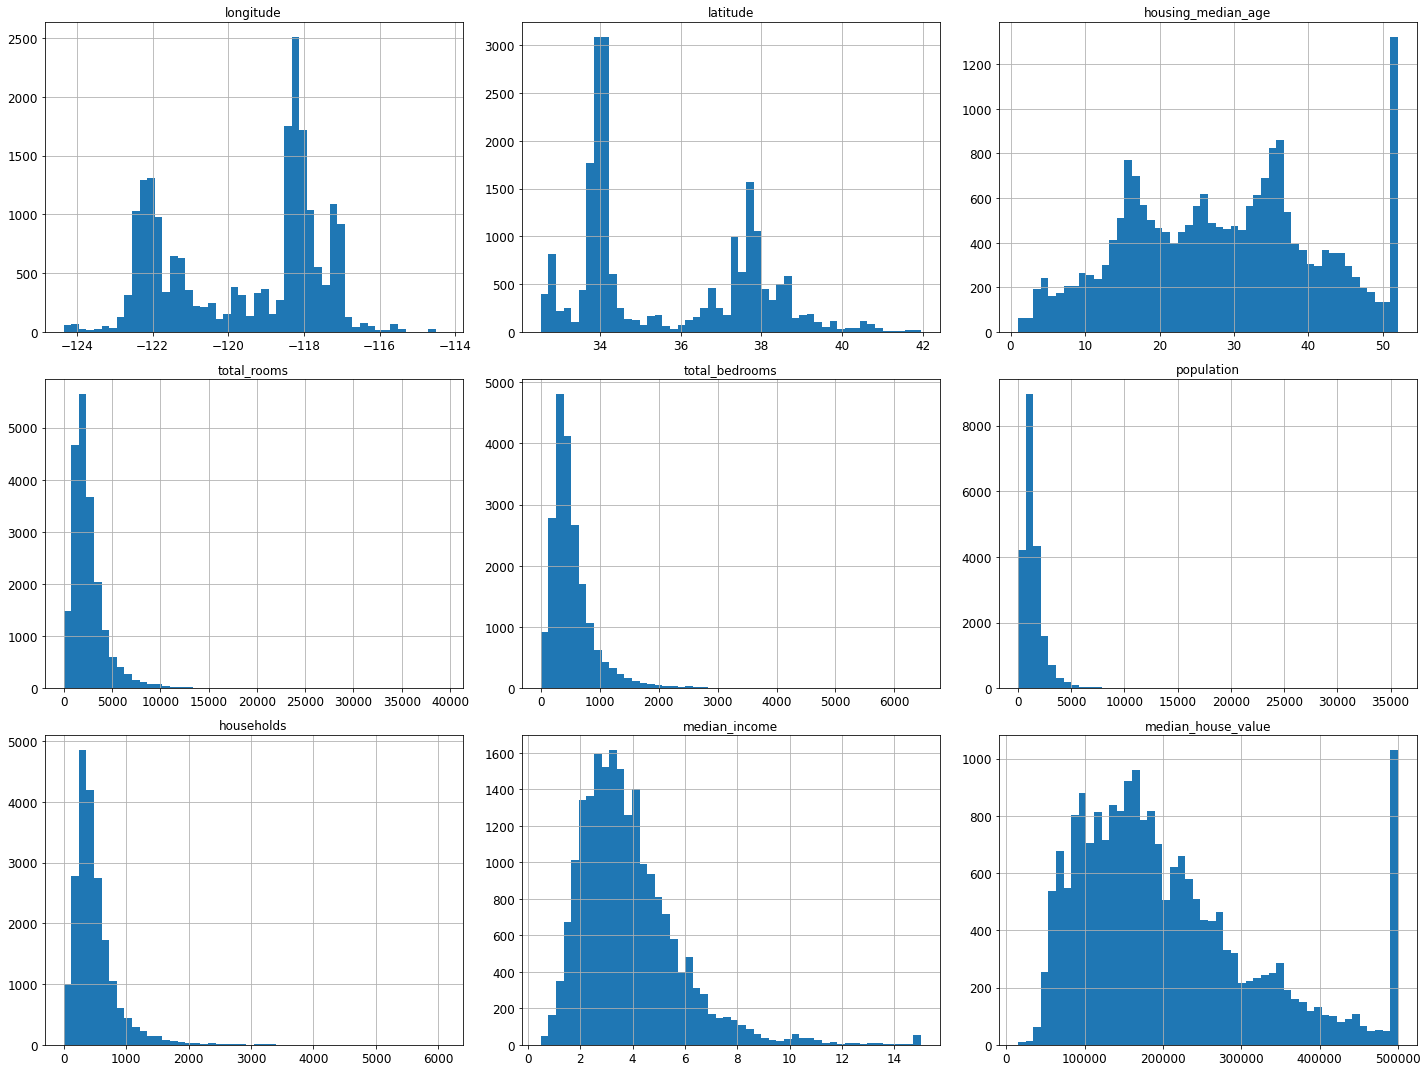

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## 创建测试集

In [10]:
from  sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

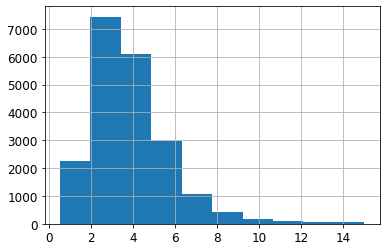

In [12]:
housing["median_income"].hist()
#可以发现横坐标6万以后的数据量较少，主要在1.5-6之间

In [13]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [14]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

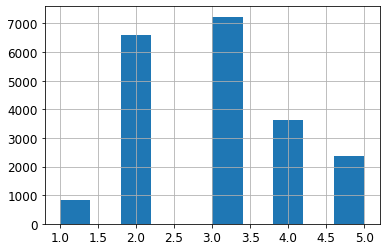

In [15]:
housing["income_cat"].hist()

已知income的因素占主要原因，所以根据income做分层抽样

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    start_train_set=housing.loc[train_index]
    start_test_set=housing.loc[test_index]       

参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10
根据Xcat分层抽样，得到一对train/test的索引值

In [17]:
start_test_set["income_cat"].value_counts()/len(start_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [18]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

两者占比率一样，分层抽样更好

In [19]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props=pd.DataFrame({
         "Overall":income_cat_proportions(housing),
         "Stratified":income_cat_proportions(start_test_set),
         "Random":income_cat_proportions(test_set)}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [21]:
for set in (start_train_set, start_test_set):
    set.drop("income_cat",axis=1,inplace=True)  #Ture表示返回的不是副本，而是删减之后原数据集

# 从数据探索和可视化中获得洞见

In [22]:
housing=start_train_set.copy()

## 将地理数据可视化

Saving figures bad_visualization_plot


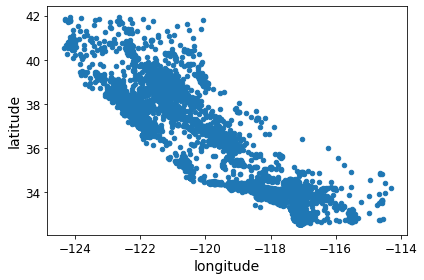

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude")
save_fig("bad_visualization_plot")

Saving figures better_visualization_plot


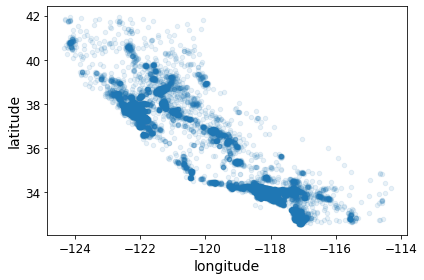

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figures housing_prices_scatterplot


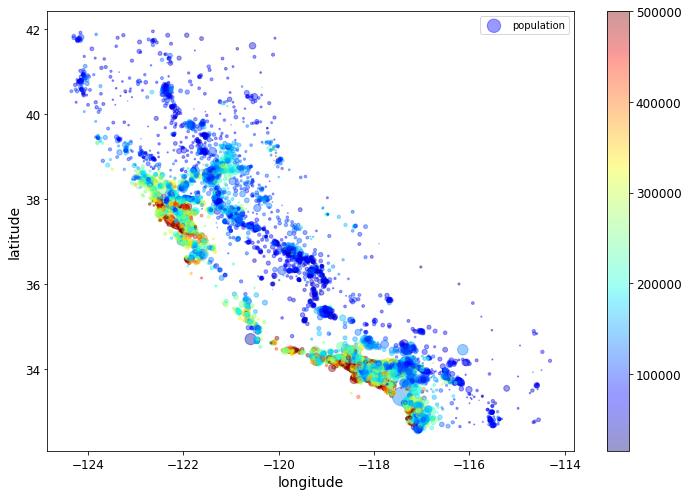

In [25]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c=housing["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend() #主要的作用就是给图加上图例
save_fig("housing_prices_scatterplot")

加州房价，红色昂贵。蓝色便宜，较大的圆表示人口较多的地区；figsize指整张图的大小，jet为预定义颜色表，colorbar为旁边颜色表

In [26]:
#Download the California image
images_path=os.path.join("images","end_to_end_project","california.png")
url="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png"
urllib.request.urlretrieve(url, images_path)

('images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1ed82caaf10>)

Saving figures california_housing_prices_plot


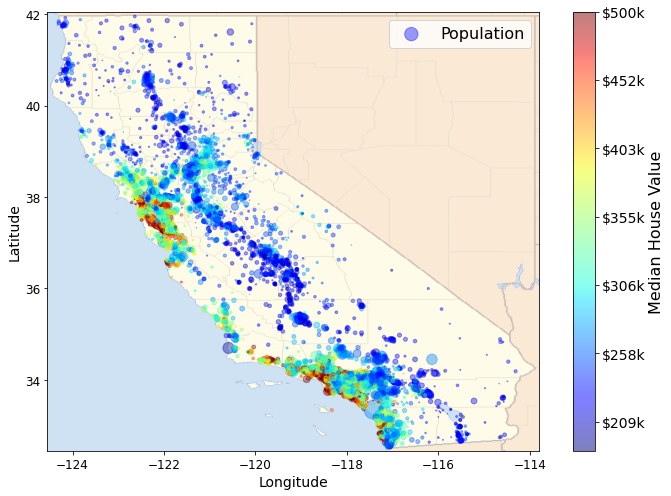

In [27]:
import matplotlib.image as mpimg
#先读取背景图，再画出散点图，最后把背景图加入散点图之后
california_img=mpimg.imread(images_path)
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value",cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05],alpha=0.5,cmap=plt.get_cmap("jet"))
#imshow()接收一张图像，只是画出该图，并不会立刻显示出来。imshow后还可以进行其他draw操作，比如scatter散点等。

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)  #从最小值到最大值等间隔采样11个点构建1D数组
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 查看相关性

In [28]:
corr_matrix=housing.corr() #计算每对属性之间的标准相关系数
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False) #查看房价中位数与各个属性之间的相关性，降序

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

另一种方法检测属性之间的相关性，散点图

Saving figures scatter_matrix_plot


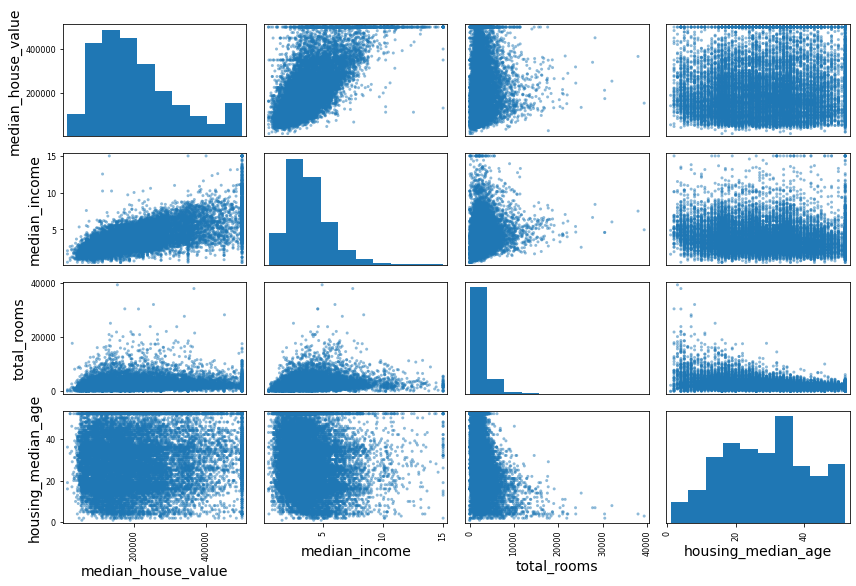

In [30]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=[12,8])
save_fig("scatter_matrix_plot")

Saving figures income_vs_hou_value_scatterplot


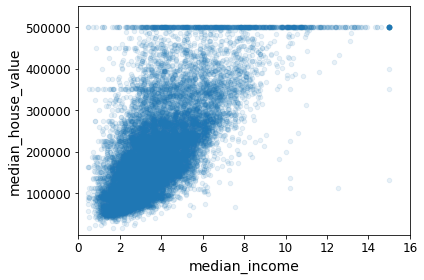

In [31]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.axis([0,16,1,550000])
save_fig("income_vs_hou_value_scatterplot")

## 试验不同属性的组合

In [32]:
#创建新属性
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
#观察加入新属性之后的相关性
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

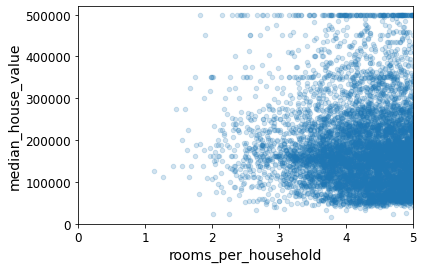

In [34]:
housing.plot(kind="scatter",x="rooms_per_household",y="median_house_value",alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

这一轮探索不一定要多么彻底，关键是迈开第一步，快速获得洞见

In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 机器学习算法的数据准备

In [36]:
housing=start_train_set.drop("median_house_value",axis=1)  #drop labels for  training set
housing_labels=start_train_set["median_house_value"].copy()

## 数据清洗

In the book 3 options are listed:

In [37]:
housing.dropna(subset=["total_bedrooms"]) # option1 放弃缺失的相应区域
housing.drop("total_bedrooms",axis=1) #option2 放弃这整个属性
median=housing["total_bedrooms"].median() #option3 用（0，平均数或者中位数补上）
housing["total_bedrooms"].fillna(median,inplace=True)

Scikit-learn提供了一个非常容易上手的类来处理缺失值

In [38]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

删除文本属性，因为中值只能在数值属性上计算

In [39]:
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [41]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

将imputer里的各个属性的中位数用来填补数据集中的缺失值

In [42]:
X=imputer.transform(housing_num)

结果是一个包含转换后特征的Numpy数组，把它转成pandas dataframe结构中

In [43]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [44]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## 处理文本和分类属性

In [45]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat1=pd.DataFrame(housing_cat_encoded,columns=housing_cat.columns,index=housing_cat.index)
housing_cat1.head(10)

,ocean_proximity
12655,1.0
15502,4.0
2908,1.0
14053,4.0
20496,0.0
1481,3.0
18125,0.0
5830,0.0
17989,0.0
4861,0.0


In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

默认情况下，OneHotEncoder类返回稀疏数组，但如果需要，我们可以通过调用toarray()方法将其转换为密集数组:

In [49]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

或者可以在创建OneHotEncoder时设置sparse=False

In [50]:
cat_encoder=OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 自定义转换器添加另外的属性

注意这是数据预处理中的方法：

Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
解释：简单来说，就是求得训练集X的均值啊，方差啊，最大值啊，最小值啊这些训练集X固有的属性。可以理解为一个训练过程

Transform(): Method using these calculated parameters apply the transformation to a particular dataset.
解释：在Fit的基础上，进行标准化，降维，归一化等操作（看具体用的是哪个工具，如PCA，StandardScaler等）。

Fit_transform(): joins the fit() and transform() method for transformation of dataset.
解释：fit_transform是fit和transform的组合，既包括了训练又包含了转换。

In [52]:
from sklearn.base import BaseEstimator,TransformerMixin

#column index
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):   #初始化,默认加bedrooms_per_room
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):  
        return self  
    def transform(self,X):  #创建转换（添加新属性）的方法
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
attr_adder= CombinedAttributesAdder(add_bedrooms_per_room=False)  #实例化
housing_extra_attribs=attr_adder.transform(housing.values)  #运用类中的方法

请注意，为了书中的简洁和清晰，我硬编码了索引(3,4,5,6)，但是动态获取索引会更整洁，像这样:

In [53]:
col_names="total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column index

另外，housing_extra_attribs是一个NumPy数组，我们丢失了列名(不幸的是，这是Scikit-Learn的一个问题)。要恢复DataFrame，可以这样运行:

In [54]:
housing_extra_attribs=pd.DataFrame(housing_extra_attribs,columns=list(housing.columns)+["rooms_per_household","population_per_household"],index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## 转换流水线

许多数据转换的步骤需要以正确的顺序来执行，用pipeline

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
            ("imputer",SimpleImputer(strategy="median")),
            ("attribs_adder",CombinedAttributesAdder()), 
            ("std_scaler",StandardScaler()),
])   # CombinedAttributesAdder()默认为True,所以加上了三个组合属性

housing_num_tr=num_pipeline.fit_transform(housing_num)

通过一系列名称/估算器的配对来定义步骤序列，先转换中位数，自定义转换器添加组合过的属性，最后特征缩放。

In [56]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

导入ColumnTransformer类将数值列和类别类放在一起处理

In [57]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
              ("num",num_pipeline,num_attribs),
              ("cat",OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)

In [58]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
housing_prepared.shape

(16512, 16)

# 选择和训练模型

## 训练和评估训练集

先训练一个线性回归模型

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

选5个数据用训练好的模型进行预测

In [61]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [62]:
print("Labels:",list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


计算整个训练集上回归模型的均方根误差

In [63]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68627.87390018743

均方误差（MSE）:不开根号；MAE(平均绝对误差)：绝对值，没有平方

In [64]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915803

换一种训练模型决策树

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [66]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

## 使用交叉验证来更好地进行评估

k折交叉验证，将训练集随机分割成10份，一份进行评估，另外九份进行训练，生成一个包含10次评估分数的数组。

In [67]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                                scoring="neg_mean_squared_error",cv=10)  
tree_rmse_scores=np.sqrt(-scores)

cross_val_score(模型，训练的数据，训练的标签，score为负的均平方误差，cv为10折)

In [68]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    
display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


定义display_scores函数打印出得到的十个score，和它们的均值、标准差。

In [69]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                          scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [70]:
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


决策树比线性回归在验证集的分数还大，且决策树在训练集上的分数远低于验证集，说明决策树过拟合了

随机森林模型

In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)  # n_estimator为子树的数目，即评估器的个数
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=42)

In [72]:
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [73]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,
                             scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


训练集上的分数远低于验证集，这意味着该模型仍然对训练集过拟合

支持向量回归

In [74]:
from sklearn.svm import SVR

svm_reg=SVR(kernel="linear")
svm_reg.fit(housing_prepared,housing_labels)

SVR(kernel='linear')

In [75]:
housing_predictions=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_labels,housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

111095.06635291966

In [76]:
from sklearn.model_selection import cross_val_score
svm_scores=cross_val_score(svm_reg,housing_prepared,housing_labels,
                          scoring="neg_mean_squared_error",cv=10)
svm_rmse_scores=np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean: 111814.1069260169
Standard deviation: 2600.840269089257


# 微调模型

## 网格搜索

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    # try 12(3*4) combinations of hyperparameters
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
    #then try 6(2*3) combinations with bootstrap set as False
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]},
    
]

forest_reg=RandomForestRegressor(random_state=42)

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring="neg_mean_squared_error",
                        return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

n_estimators=10：决策树的个数，越多越好，但是性能就会越差，至少100左右（具体数字忘记从哪里来的了）可以达到可接受的性能和误差率。  bootstrap=True：是否有放回的采样。  

In [78]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [80]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([0.04803624, 0.15099306, 0.45656919, 0.07500567, 0.24301152,
        0.74468207, 0.1085381 , 0.32865434, 0.99366922, 0.1268157 ,
        0.42050047, 1.25863504, 0.07120748, 0.23575268, 0.09255204,
        0.30747409, 0.11605606, 0.38520341]),
 'std_fit_time': array([0.00177903, 0.00277638, 0.00546224, 0.0011677 , 0.00374624,
        0.00937296, 0.00599872, 0.00314465, 0.00509869, 0.00209444,
        0.00126891, 0.00563562, 0.00118905, 0.00167026, 0.00171744,
        0.00180706, 0.00128143, 0.00263864]),
 'mean_score_time': array([0.00219359, 0.00797176, 0.02193842, 0.0023932 , 0.00776882,
        0.02232699, 0.00318809, 0.00797429, 0.02124209, 0.00298476,
        0.00758104, 0.0213326 , 0.00298223, 0.00877209, 0.00299125,
        0.00837326, 0.00318656, 0.00876861]),
 'std_score_time': array([3.99399515e-04, 6.30171452e-04, 6.72762988e-06, 4.89142741e-04,
        7.46508490e-04, 4.99111023e-04, 4.00753233e-04, 4.63440583e-06,
        4.00194953e-04, 5.84587576e-

In [81]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [82]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048036,0.001779,0.002194,0.000399,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.150993,0.002776,0.007972,0.000630,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.456569,0.005462,0.021938,0.000007,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.075006,0.001168,0.002393,0.000489,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.243012,0.003746,0.007769,0.000747,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.744682,0.009373,0.022327,0.000499,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.108538,0.005999,0.003188,0.000401,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.328654,0.003145,0.007974,0.000005,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,0.993669,0.005099,0.021242,0.000400,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.126816,0.002094,0.002985,0.000006,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## 随机搜索

当超参数搜索范围较大时，用随机搜索

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
            "n_estimators":randint(low=1,high=200),
            "max_features":randint(low=1,high=8),
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,
                             n_iter=10,cv=5,scoring="neg_mean_squared_error",random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ED821E4340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ED83902B80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [84]:
cvres=rnd_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [85]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.927540,0.129877,0.130807,0.008019,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.399428e+09,-2.335777e+09,-2.313461e+09,-2.476625e+09,-2.537379e+09,-2.412534e+09,8.434791e+07,1
1,0.450755,0.011878,0.011964,0.000894,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.597812e+09,-2.590195e+09,-2.528533e+09,-2.769539e+09,-2.749759e+09,-2.647168e+09,9.513750e+07,9
2,1.412680,0.028523,0.052071,0.002621,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.569955e+09,-2.512528e+09,-2.438188e+09,-2.656741e+09,-2.671254e+09,-2.569733e+09,8.769636e+07,7
3,0.607062,0.010381,0.015552,0.000487,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.583962e+09,-2.515286e+09,-2.474528e+09,-2.649628e+09,-2.671474e+09,-2.578976e+09,7.554893e+07,8
4,4.593030,0.014946,0.085571,0.000751,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.403611e+09,-2.347924e+09,-2.328235e+09,-2.466494e+09,-2.538690e+09,-2.416991e+09,7.757318e+07,2
5,1.444599,0.006259,0.052653,0.000402,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.570132e+09,-2.508518e+09,-2.437703e+09,-2.653315e+09,-2.660383e+09,-2.566010e+09,8.522149e+07,6
6,1.701795,0.018843,0.062659,0.000766,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.554075e+09,-2.501453e+09,-2.419114e+09,-2.640202e+09,-2.643405e+09,-2.551650e+09,8.526641e+07,5
7,2.973253,0.040332,0.072026,0.002218,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.476178e+09,-2.358022e+09,-2.353633e+09,-2.518094e+09,-2.555806e+09,-2.452346e+09,8.274789e+07,3
8,3.012970,0.068299,0.106442,0.001526,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.553841e+09,-2.457321e+09,-2.421557e+09,-2.600262e+09,-2.618930e+09,-2.530382e+09,7.804472e+07,4
9,0.059059,0.000396,0.001985,0.000002,5,2,"{'max_features': 5, 'n_estimators': 2}",-4.023932e+09,-3.942094e+09,-4.289511e+09,-4.516468e+09,-4.461698e+09,-4.246741e+09,2.294524e+08,10


## 分析最佳模型及其误差

In [86]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances #每个属性的相对重要性

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [87]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]  
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

## 通过测试集评估系统

In [88]:
final_model=grid_search.best_estimator_
X_test=start_test_set.drop("median_house_value",axis=1)
Y_test=start_test_set["median_house_value"].copy()

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47873.26095812988

In [89]:
final_predictions

array([488167.46666667, 229946.66666667, 209950.        , ...,
       390406.86666667, 246210.03333333, 223533.33333333])

计算95%置信区间

In [90]:
from scipy import stats

confidence=0.95
squared_errors=(final_predictions-Y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))


array([45893.36082829, 49774.46796717])

interval=stats.t.interval(a,b,mean,tsem)
t分布的置信区间
confidence:置信水平
len():检验量的自由度
loc:样本均值
scale:均值标准差

1、Z-score：也叫标准分数是一个数与平均数的差再除以标准差的过程。

2、T-score：是统计中求相对位置数量的一个概念。

使用上的区别：当样本较大（n大于30）时，通常计算Z-score，但当样本小于30时，优选T-score。

In [91]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.3608282853, 49774.46796717339)

In [92]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.954011012866, 49773.92103065016)

# 附加材料

## 数据准备和预测的完整流程

In [93]:
full_pipeline_with_predictor=Pipeline([
    ("preparation",full_pipeline),
    ("linear",LinearRegression())
])

full_pipeline_with_predictor.fit(housing,housing_labels)
final_predictions=full_pipeline_with_predictor.predict(X_test)  #没有经过pipeline的数据集

final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

66913.4419132093

In [94]:
full_pipeline_with_predictor=Pipeline([
    ("preparation",full_pipeline),
    ("best",final_model)
])

full_pipeline_with_predictor.fit(housing,housing_labels)
final_predictions=full_pipeline_with_predictor.predict(X_test)  #没有经过pipeline的数据集

final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47873.26095812988

## 用joblib维护模型

In [95]:
my_model=full_pipeline_with_predictor

import joblib
joblib.dump(my_model,"my_model.pkl")
my_model_loaded=joblib.load("my_model.pkl")

## 用于超参数随机化搜索的几个分布

Grid Search 只需为每个参数事先指定一个参数列表就可以了，而 Random Search 则通常需要为每个参数制定一个概率分布，进而从这些分布中进行抽样，具体见网页收藏机器学习。

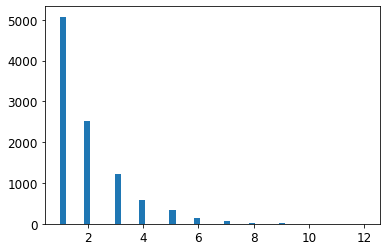

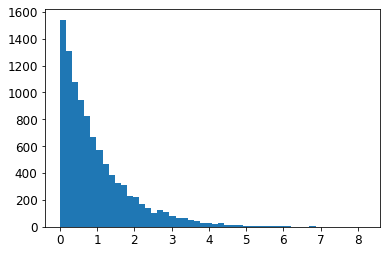

In [96]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42) # p为0.5，随机抽样10000次
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# 练习题

## 尝试使用支持向量机回归器(' sklearn.svm.SVR ')，使用各种超参数，例如' kernel="linear" (' C '超参数的不同值)或' kernel="rbf" (' C '和' gamma '超参数的不同值)。现在不要担心这些超参数意味着什么。最好的“SVR”预测器表现如何?

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
        "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=  11.7s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=  11.8s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=  11.6s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=  11.4s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=  11.4s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=  11.4s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=  11.2s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=  11.2s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=  11.3s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=  11.4s
[CV] END .......................C=1.0, gamma=0.1, kernel=rbf; total time=  11.8s
[CV] END .......................C=1.0, gamma=0.

[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=  11.6s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=  11.8s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=  11.7s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=  11.7s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=  11.4s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=  10.9s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=  10.8s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=  11.1s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=  11.6s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  11.1s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.6s
[CV] END ......................C=30.0, gamma=1.0, kernel=rbf; total time=  10.6s
[CV] END ...................

[CV] END ....................C=1000.0, gamma=1.0, kernel=rbf; total time=  10.6s
[CV] END ....................C=1000.0, gamma=1.0, kernel=rbf; total time=  10.5s
[CV] END ....................C=1000.0, gamma=3.0, kernel=rbf; total time=  11.3s
[CV] END ....................C=1000.0, gamma=3.0, kernel=rbf; total time=  11.2s
[CV] END ....................C=1000.0, gamma=3.0, kernel=rbf; total time=  11.4s
[CV] END ....................C=1000.0, gamma=3.0, kernel=rbf; total time=  11.7s
[CV] END ....................C=1000.0, gamma=3.0, kernel=rbf; total time=  11.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.9s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']},
                         {'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [98]:
svm_reg.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

verbose是日志显示，有三个参数可选择，分别为0,1和2
当verbose=0时，简单说就是不输出日志信息 ，进度条、loss、acc这些都不输出。
当verbose=1时，带进度条的输出日志信息
当verbose=2时，为每个epoch输出一行记录，和1的区别就是没有进度条

In [99]:
negative_mse=grid_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

70286.61836530612

In [100]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

## 尝试用RandomizedSearchCV替换GridSearchCV

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon,reciprocal

param_distribs={
        "kernel":["linear","rbf"],
        "C":reciprocal(20,200000),
        "gamma":expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  11.4s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  11.2s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  11.4s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   6.2s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   6.2s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   6.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   6.2s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   6.2s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.9min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.8min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.9min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   6.3s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  11.5s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  11.5s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  11.5s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  11.5s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  11.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.7s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.6s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.6s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   6.6s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ED89C71B80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ED89C71D90>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256622

In [103]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

让我们看看我们使用的指数分布，当比例=1.0时。注意，有些样本值大于或小于1.0，但是当您查看分布的对数时，您可以看到大多数值实际上大致集中在exp(-2)到exp(+2)的范围内，即大约0.1到7.4。

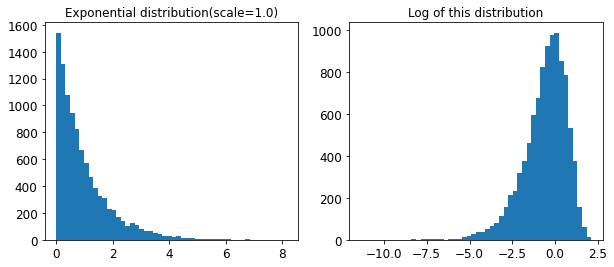

In [104]:
expon_distrib=expon(scale=1.0)
samples=expon_distrib.rvs(10000,random_state=42)
plt.figure(figsize=(10,4)) # 画布大小
plt.subplot(121) # subplot(233)表示在当前画布的右上角创建一个两行三列的绘图区域，同时选择在第 3 个位置绘制子图
plt.title("Exponential distribution(scale=1.0)")
plt.hist(samples,bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=50)
plt.show()

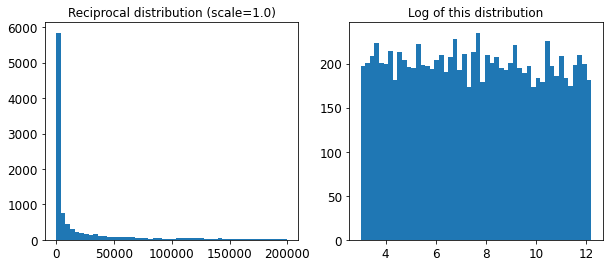

In [105]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

这种分布的好处是在不同的取值范围内也能均匀地抽样。如上图中参数 的取值范围是 ， 即 ，如果是一般的均匀分布中抽样， 这个范围被取样到的概率会远大于 和 这两个范围，因为前者的距离更大，但在对数均匀分布中三者的范围却是一样的，都是10的倍数，这样被抽样到的概率也就类似。详情见网页收藏。

## 尝试在准备流水性中添加一个转换器，从而只选择最重要的属性。

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k): 
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])
# 数组从小到大排序，第k+1大的数放在新数组索引为k的位置，比第k+1小的数放在这个数之前，比之大的数放在之后，最后返回新数组的数在原数组的索引。
# 返回数组中分数前五名的索引

# 得到索引在处理过的数据里的部分
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

注意:这个特性选择器假设你已经以某种方式计算了特性的重要性(例如使用RandomForestRegressor)。你可能会想在TopFeatureSelector的fit()方法中直接计算它们，然而这可能会减慢网格/随机搜索，因为每个超参数组合都必须计算特征重要性(除非你实现了某种缓存)。

In [107]:
top_k_feature_indices=indices_of_top_k(feature_importances,k=5)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [108]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [109]:
TopFeatureSelector(feature_importances,5).fit_transform(housing_prepared)

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ],
       ...,
       [-1.5707942 ,  1.31001828, -0.36547546, -0.03743619,  0.        ],
       [-1.56080303,  1.2492109 ,  0.16826095, -0.05915604,  0.        ],
       [-1.28105026,  2.02567448, -0.390569  ,  0.00657083,  1.        ]])

In [110]:
preparation_and_feature_selection_pipeline=Pipeline([
    ("prerparation",full_pipeline),
    ("feature_selection",TopFeatureSelector(feature_importances,k=5))
])

In [111]:
housing_prepared_top_k_features=preparation_and_feature_selection_pipeline.fit_transform(housing)

In [112]:
housing_prepared_top_k_features

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ],
       ...,
       [-1.5707942 ,  1.31001828, -0.36547546, -0.03743619,  0.        ],
       [-1.56080303,  1.2492109 ,  0.16826095, -0.05915604,  0.        ],
       [-1.28105026,  2.02567448, -0.390569  ,  0.00657083,  1.        ]])

## 尝试创建一个覆盖完整的数据准备和最终预测的流水线

In [113]:
prepare_select_and_predict_pipeline=Pipeline([
    ("preparation",full_pipeline), # 数据集准备
    ("feature_selection",TopFeatureSelector(feature_importances,5)),  # 根据上面得到的属性重要性排名，筛选出前k个的属性得到新的数据集
    ("svm_reg",SVR(**rnd_search.best_params_))  # 选择上面训练出来的效果最好的超参数组合进行训练
])

In [114]:
prepare_select_and_predict_pipeline.fit(housing,housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

选择用SVR最好的超参数和筛选过的属性特征去训练模型

In [115]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345143 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


In [116]:
prepare_select_and_predict_pipeline.predict(X_test)   #因为转换器已经有处理数据集的功能，所以直接填上原始数据集

array([476943.83358636, 245388.88803267, 223879.87382942, ...,
       324482.09770517, 262556.50238039, 229857.35355149])

## 使用GridSearchCV自动探索一些准备选项

In [117]:
full_pipeline.named_transformers_["cat"]

OneHotEncoder()

In [118]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [119]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [120]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

In [121]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],   # 选择用什么去填补缺失项
    'feature_selection__k': list(range(1, len(feature_importances) + 1))   # 筛选到底选前几个的属性去训练
}]

In [122]:
prepare_select_and_predict_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'feature_selection', 'svm_reg', 'preparation__n_jobs', 'preparation__remainder', 'preparation__sparse_threshold', 'preparation__transformer_weights', 'preparation__transformers', 'preparation__verbose', 'preparation__verbose_feature_names_out', 'preparation__num', 'preparation__cat', 'preparation__num__memory', 'preparation__num__steps', 'preparation__num__verbose', 'preparation__num__imputer', 'preparation__num__attribs_adder', 'preparation__num__std_scaler', 'preparation__num__imputer__add_indicator', 'preparation__num__imputer__copy', 'preparation__num__imputer__fill_value', 'preparation__num__imputer__missing_values', 'preparation__num__imputer__strategy', 'preparation__num__imputer__verbose', 'preparation__num__attribs_adder__add_bedrooms_per_room', 'preparation__num__std_scaler__copy', 'preparation__num__std_scaler__with_mean', 'preparation__num__std_scaler__with_std', 'preparation__cat__categories', 'preparation__cat__drop'

In [123]:
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   8.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  11.3s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  11.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  11.4s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  11.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  11.7s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   8.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.4s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   8.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  11.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  11.7s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  11.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  11.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  11.6s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  11.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  11.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  11.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  11.6s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  11.9s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   8.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  11.7s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   8.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  11.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  12.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  12.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  12.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  12.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   8.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  12.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  12.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  12.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  12.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  12.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  12.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  12.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  12.4s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  12.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  12.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   8.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  12.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  12.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  12.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  12.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  12.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  12.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  13.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  13.8s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.1s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   9.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  13.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  14.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  14.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  12.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  14.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  15.1s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.8s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  11.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  14.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  14.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  14.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  14.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  18.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  16.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  17.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  20.1s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  14.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  18.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  19.1s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  13.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  18.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  19.0s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  21.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  20.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  21.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  19.4s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  15.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  21.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  20.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  22.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.5s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  15.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  21.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  20.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  21.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  19.4s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  18.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  19.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  21.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  23.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  22.2s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  18.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.7s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  21.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  24.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  21.8s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  18.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  20.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  21.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  24.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  22.1s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  20.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  24.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  20.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  25.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  20.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  24.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  20.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  25.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  24.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  20.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  25.0s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  22.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  21.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  23.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  26.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  26.4s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  22.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  21.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  23.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  26.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  26.3s


D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\skl

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  22.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  21.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  24.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  26.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  26.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  24.1s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  23.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  25.8s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  24.6s
[CV] 

D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\software\Anaconda3\envs\tensorflow-envs\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       